# Train e Test del dataset Appointment 

## Import delle librerie

In [1]:
!pip install --user -r requirements.txt

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns

from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

## Caricamento dei dataset

In [4]:
url_train = 'train.csv'
url_test = 'test.csv'

train_data = pd.read_csv(url_train)
test_data = pd.read_csv(url_test)

In [5]:
# Stampa delle prime 10 righe del dataset di train
train_data.head(50)

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,5.851646e+13,5733018,F,2016-05-24T13:10:52Z,2016-05-24T00:00:00Z,46,MARUÍPE,0,0,0,0,0,0
1,No,4.271142e+13,5646600,F,2016-05-02T11:31:29Z,2016-05-31T00:00:00Z,52,SÃO CRISTÓVÃO,0,0,0,0,0,1
2,No,3.694423e+12,5681694,M,2016-05-10T14:58:13Z,2016-05-17T00:00:00Z,10,ANDORINHAS,0,0,0,0,0,0
3,No,3.985635e+12,5702986,F,2016-05-16T13:22:22Z,2016-05-16T00:00:00Z,50,RESISTÊNCIA,0,0,0,0,0,0
4,No,4.581993e+11,5778033,M,2016-06-06T14:56:11Z,2016-06-06T00:00:00Z,74,JOANA D´ARC,0,0,0,0,0,0
5,No,9.833963e+12,5653426,F,2016-05-03T12:09:03Z,2016-05-03T00:00:00Z,59,JARDIM DA PENHA,0,0,0,0,0,0
6,No,6.914179e+14,5649261,M,2016-05-02T18:48:54Z,2016-05-03T00:00:00Z,55,JARDIM CAMBURI,0,0,0,0,0,0
7,No,2.713724e+13,5685095,F,2016-05-11T09:40:46Z,2016-05-11T00:00:00Z,56,JARDIM CAMBURI,0,0,0,0,0,0
8,Yes,1.833374e+13,5633388,F,2016-04-28T09:23:51Z,2016-05-04T00:00:00Z,72,MARUÍPE,0,1,0,0,0,0
9,No,8.827835e+11,5754399,F,2016-05-31T16:10:55Z,2016-05-31T00:00:00Z,28,JARDIM CAMBURI,0,0,0,0,0,0


## Analisi del dataset

In [6]:
# Numero di righe e colonne nel dataset
print(f"Shape: {train_data.shape}")
print(f"Numero di righe (utenti telefonici): {train_data.shape[0]}")
print(f"Numero di colonne: {train_data.shape[1]}")

Shape: (70736, 14)
Numero di righe (utenti telefonici): 70736
Numero di colonne: 14


Osserviamo il tipo di ogni colonna.

In [7]:
train_data.dtypes

No-show            object
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
dtype: object

Spieghiamo il significato di ogni colonna del dataset:

**PatientId**
    Identificazione di un paziente

**AppointmentID**
    Identificazione di ogni appuntamento

**Gender**
    Maschio o femmina.

**AppointmentDay**
    Il giorno dell'appuntamento effettivo, quando devono visitare il medico.

**ScheduledDay**
    Il giorno in cui qualcuno ha chiamato o registrato l'appuntamento, ovviamente prima dell'appuntamento.

**Age**
    Quanti anni ha il paziente.

**Neighbourhood**
    Dove si svolge l'appuntamento.

**Scholarship**
    È una sorta di assicurazione familiare per la salute

**Hipertension, Diabetes, Alcoholism, Handcap**
   Sì/No

**SMS_received**
    1 o più messaggi inviati al paziente.

Vediamo i valori che sono contenuti dentro ogni colonna.

In [8]:
for val in train_data:
  print(train_data[val].value_counts())
  print()

No     56378
Yes    14358
Name: No-show, dtype: int64

8.221459e+14    61
9.963767e+10    55
2.688613e+13    49
3.353478e+13    43
6.264199e+12    42
                ..
9.218652e+13     1
8.393899e+11     1
5.117369e+12     1
8.124216e+13     1
6.397765e+13     1
Name: PatientId, Length: 46525, dtype: int64

5638143    1
5606308    1
5667738    1
5655452    1
5621055    1
          ..
5702922    1
5709065    1
5590275    1
5719298    1
5771266    1
Name: AppointmentID, Length: 70736, dtype: int64

F    45954
M    24782
Name: Gender, dtype: int64

2016-04-25T17:18:27Z    18
2016-04-25T17:17:46Z    18
2016-05-06T07:09:53Z    16
2016-05-06T07:09:54Z    14
2016-04-25T17:17:23Z    11
                        ..
2016-05-04T08:46:59Z     1
2016-05-16T14:09:37Z     1
2016-05-10T07:37:53Z     1
2016-05-12T09:46:01Z     1
2016-05-17T08:24:39Z     1
Name: ScheduledDay, Length: 67647, dtype: int64

2016-06-06T00:00:00Z    3016
2016-06-08T00:00:00Z    2931
2016-05-16T00:00:00Z    2873
2016-05-11T00:

### Rimozione delle righe con valori nulli

Procediamo ora con l'osservare se ci sono righe nulle sia sul dataset di train che su quello di test. Tali righe saranno considerate non valide e dovranno, pertanto, essere rimosse dal dataset per evitare possibili errori durante l'addestramento.

In [9]:
# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di train
train_data.replace("", np.nan, inplace=True)
train_data.replace(" ", np.nan, inplace=True)
train_data.replace("?", np.nan, inplace=True)
train_data.replace("nan", np.nan, inplace=True)
train_data.replace("na", np.nan, inplace=True)
train_data.replace("NaN", np.nan, inplace=True)

# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di test
test_data.replace("", np.nan, inplace=True)
test_data.replace(" ", np.nan, inplace=True)
test_data.replace("?", np.nan, inplace=True)
test_data.replace("nan", np.nan, inplace=True)
test_data.replace("na", np.nan, inplace=True)
test_data.replace("NaN", np.nan, inplace=True)

In [10]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

In [11]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

Rimozione delle righe con valori nulli.

In [12]:
# Procediamo con l'eliminazione dei dati non validi (NaN)
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Controlliamo nuovamente se sono state eliminate tutte le righe con valori nulli.

In [13]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

In [14]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

## Statistiche sul dataset

In [15]:
# Statistiche
train_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.073600e+04,7.073600e+04,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000,70736.000000
mean,1.476368e+14,5.675625e+06,37.199672,0.099327,0.199092,0.072862,0.030663,0.022520,0.321519
std,2.564208e+14,7.117946e+04,23.097387,0.299103,0.399321,0.259912,0.172405,0.162816,0.467063
min,3.921784e+04,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.156342e+12,5.640484e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.167306e+13,5.680898e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433715e+13,5.725878e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999686e+14,5.790481e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# Numero delle persone che non si sono presentate alla visita (No-show)
# No: si sono presentati
# Yes: non si sono presentati
train_data['No-show'].value_counts()

No     56378
Yes    14358
Name: No-show, dtype: int64

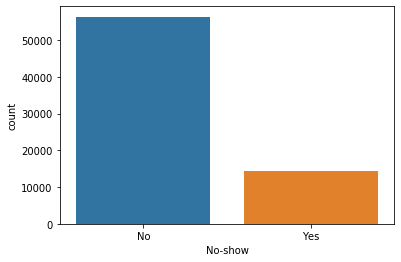

In [17]:
# Diagramma che confronta le persone che hanno lasciato la compagnia telefonica
sns.countplot(train_data['No-show'])

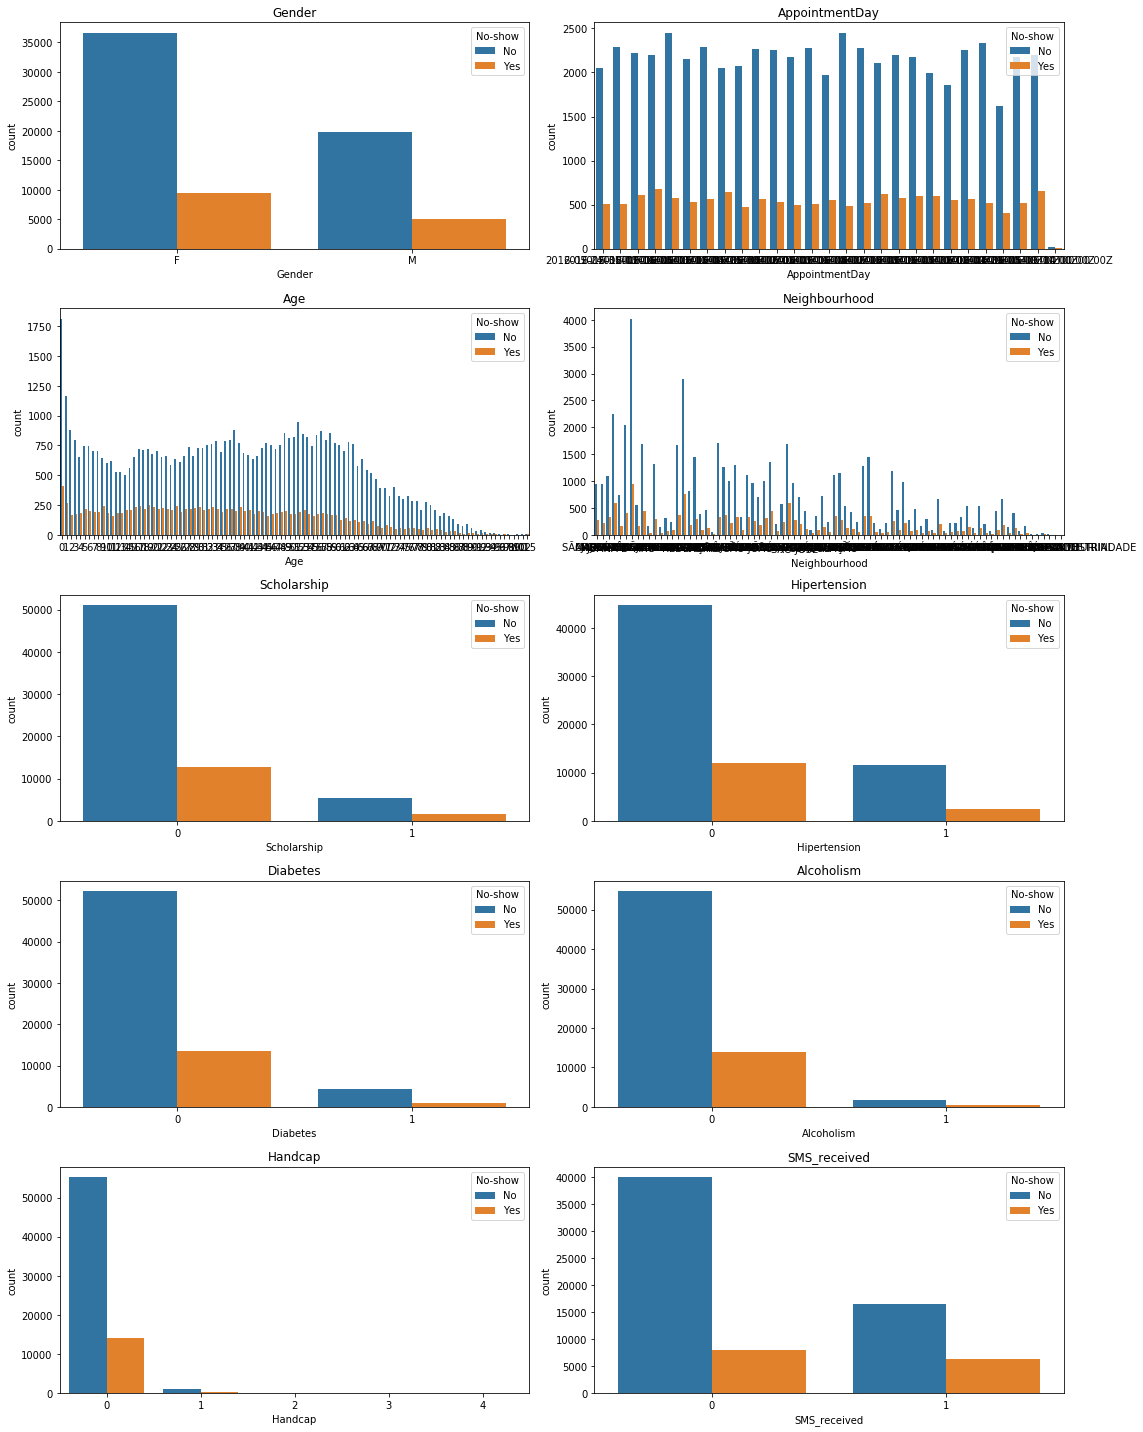

In [18]:
# Alcuni grafici che mettono in relazione le features
# del dataset con le persone che non si sono presentati alla visita

cols = ['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

n_rows = 5
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
i=0
for r in range(n_rows):
    for c in range(n_cols):
        ax = axs[r][c]
        sns.countplot(train_data[cols[i]], hue=train_data['No-show'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='No-show', loc='upper right')
        i+=1
    
plt.tight_layout()



## Divisione dei dataset

In [19]:
# Scegliamo le colonne su cui NON voglimo addestrare il modello
not_features = ['AppointmentID', 'AppointmentDay', 'Gender']

In [20]:
# Dividiamo il train-set e il test-set in due parti così da poter addestrare la rete:
# y che contiene solo la colonna label 'No-show' che consiste nella soluzione al problema
# X che contiene tutte le altre colonne specificate in 'features'.
y_train = train_data.pop('No-show')
X_train = train_data.drop(not_features, axis=1)

y_test = test_data.pop('No-show')
X_test = test_data.drop(not_features, axis=1)

## Modello

Per prima cosa eseguiamo l'encoder della nostra colonna label ```y```

In [21]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

Adesso è il momento di creare il modello da addestrare tramite i dati di train.
Per prima cosa definiamo una Pipeline di processamento per i dati ```X```.

In [22]:
# Definiamo le colonne che sono in forma numerica
numeric_features = list(X_train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))
not_numeric_features = list(X_train.columns[X_train.dtypes=='object'])

print(numeric_features)
print(not_numeric_features)

['PatientId', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
['ScheduledDay', 'Neighbourhood']


Definiamo una Pipeline per la codifica dei valori Numerici

In [23]:
# Definiamo una Pipeline per la codifica dei valori Numerici
numeric_transformer = Pipeline(
    steps=[('simple_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Definiamo una Pipeline per la codifica dei valori NON Numerici

In [24]:
# Definiamo una Pipeline per la codifica dei valori NON Numerici
not_numeric_transformer = Pipeline(
    steps=[('simple_imputer', SimpleImputer(strategy='most_frequent')),
           ('one_hot', OneHotEncoder(handle_unknown='ignore'))])

Assembliamo le due Pipeline in un trasformer per colonne

In [25]:
preprocessor = ColumnTransformer(
    transformers=[('numeric_transformer', numeric_transformer, numeric_features),
                  ('not_numeric_transformer', not_numeric_transformer, not_numeric_features)])

Infine creiamo la Pipeline che verrà utilizzata durante l'addestramento e comprendente delle precedenti. Questa sarà il nostro modello per l'addestramento.

In [26]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [27]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PatientId', 'Age',
                                                   'Scholarship',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism', 'Handcap',
                                                   'SMS_received']),
                                                 ('not_numeric_transformer',
                                                  Pipeline(steps=[('simple_imputer',
                   

## Addestramento

In [28]:
model = model.fit(X_train, y_train)

In [29]:
print(model.score(X_train, y_train))

0.9998162180502149


In [30]:
prediction_model = model.predict(X_test)
print(accuracy_score(y_test, prediction_model.round()))

0.8046366977664687


In [31]:
print(classification_report(y_test, prediction_model.round()))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     14161
           1       0.74      0.03      0.06      3524

    accuracy                           0.80     17685
   macro avg       0.77      0.51      0.47     17685
weighted avg       0.79      0.80      0.72     17685

